# Lung and Colon Cancer Detection

##   Importing Libraries

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [2]:
from PIL import Image
from keras.applications import vgg16

## Importing Dataset

In [3]:
path=r"C:\Users\elain\coding\Notebook\Lung and colon disease\lung and colon"
classes = os.listdir(path)
classes

['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']

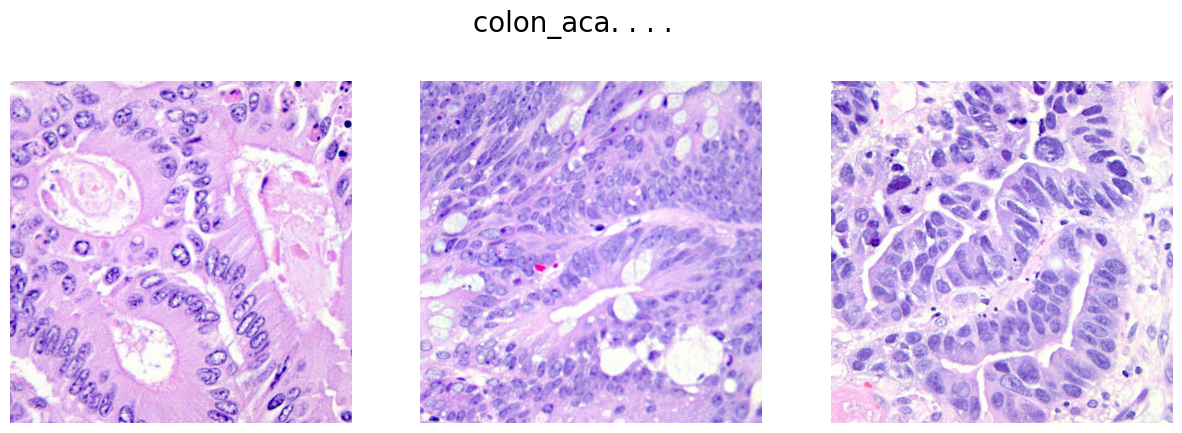

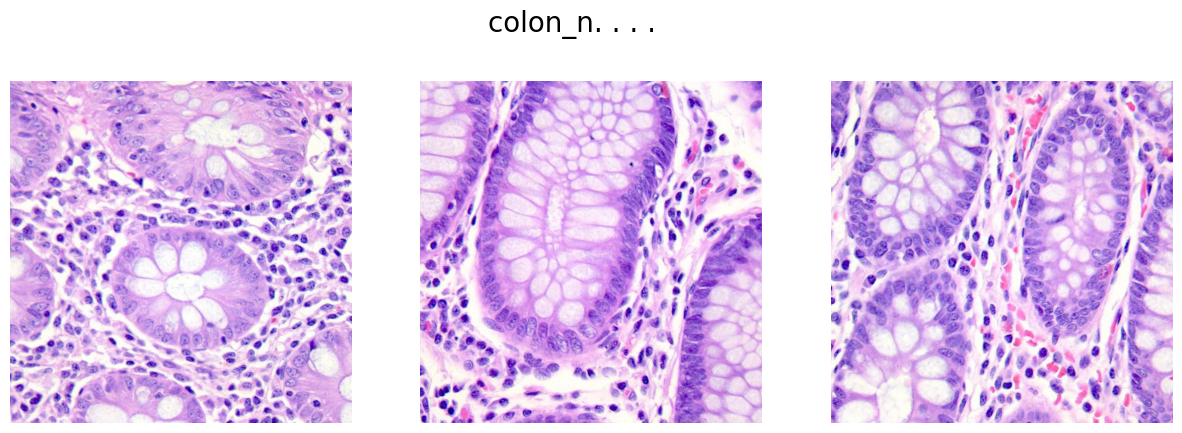

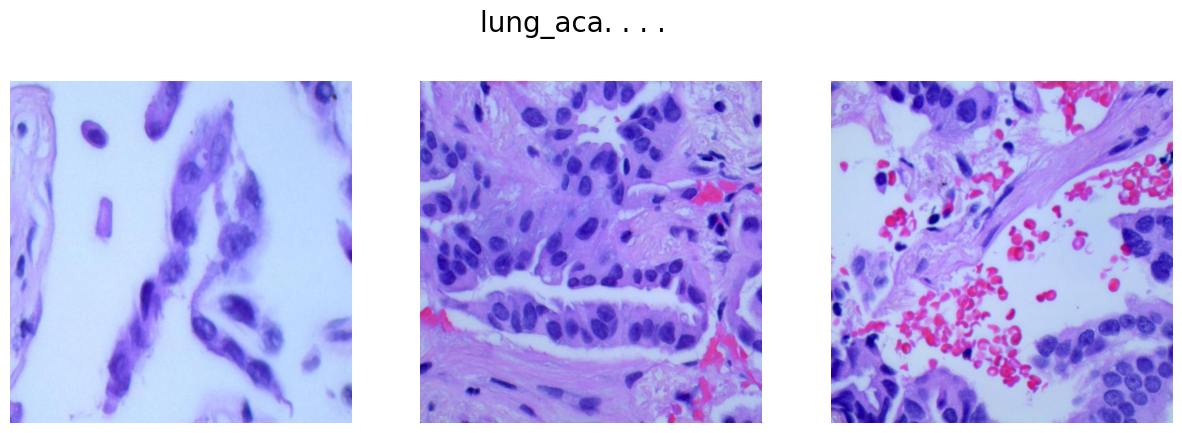

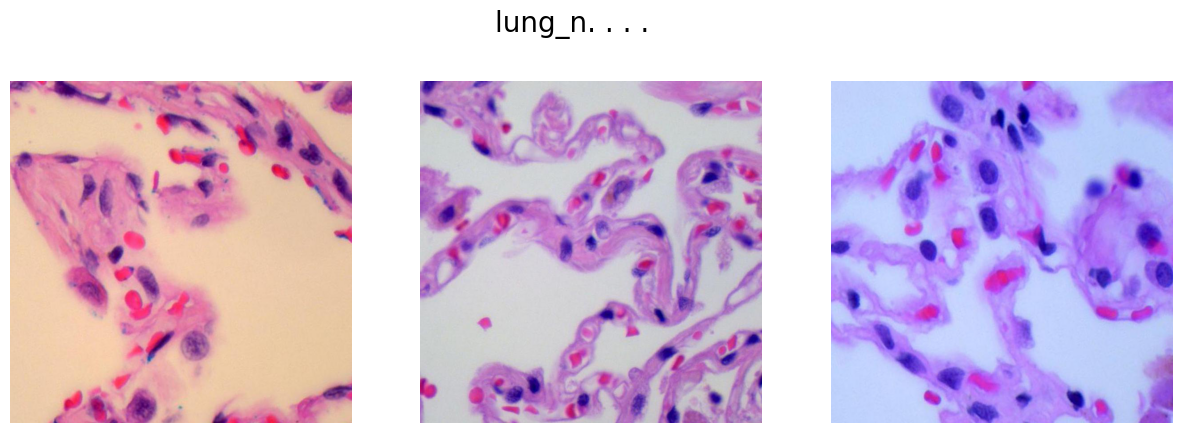

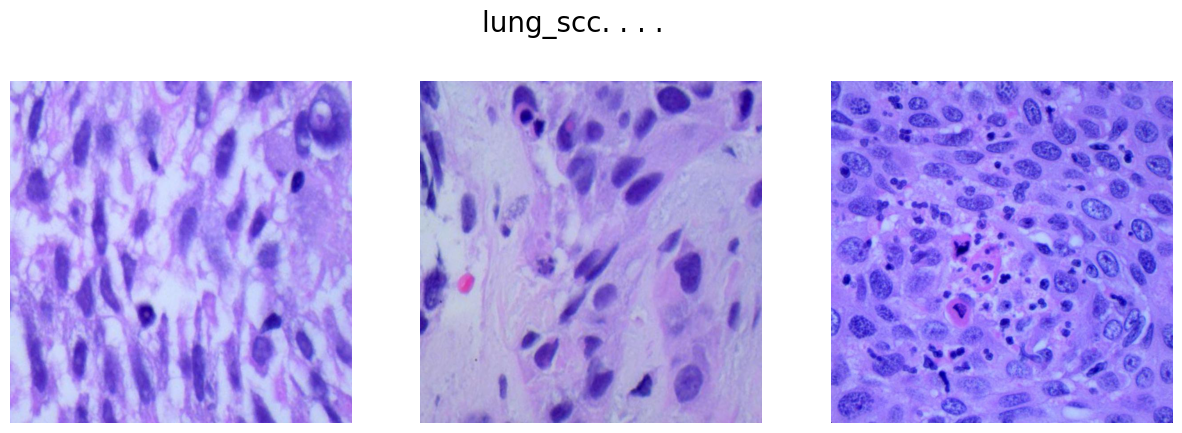

In [4]:
#Sample class iteration
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'{cat}. . . .', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

## Data Preprocessing

### Creating new size

In [5]:
IMG_SIZE=224
new=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(new)

In [6]:
new.shape

(224, 224, 3)

### Creating labels

In [7]:
cls = {
    'Colon adenocarcinoma': 0,
    'Colon Normal': 1,
    'Lung adenocarcinoma': 2,
    'Lung Normal': 3,
    'Lung squamous cell carcinoma': 4,
    
}
cls_list = list(cls.items())

#Example
index = 2 
class_name, numeric_label = cls_list[index]
print(f"Class name at index {index}: {class_name}")
print(f"Numeric label at index {index}: {numeric_label}")

Class name at index 2: Lung adenocarcinoma
Numeric label at index 2: 2


### Creating training data

In [8]:
dir_to_cls = {
    'colon_aca': 'Colon adenocarcinoma',
    'colon_n': 'Colon Normal',
    'lung_aca': 'Lung adenocarcinoma',
    'lung_n': 'Lung Normal',
    'lung_scc': 'Lung squamous cell carcinoma'
}
data=[]
for cat in classes:
    # Translate directory name to category name
    category_name = dir_to_cls.get(cat, None) 
    image_dir = os.path.join(path, cat)
    images = os.listdir(image_dir)
    
    # Get the label for the current category
    label = cls.get(category_name, -1)
    
    for img_name in images:
        try:
            img_path = os.path.join(image_dir, img_name)
            img_array = cv2.imread(img_path)           
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, label])
        
        except Exception as e:
            print(f"Error processing image {img_name} in category {cat}: {e}")
            pass
        

In [9]:
data

[[array([[[236, 233, 255],
          [229, 204, 250],
          [234, 180, 239],
          ...,
          [220, 179, 220],
          [207, 158, 200],
          [223, 169, 212]],
  
         [[245, 227, 253],
          [236, 202, 250],
          [231, 173, 234],
          ...,
          [225, 183, 224],
          [225, 171, 214],
          [241, 179, 223]],
  
         [[245, 220, 250],
          [237, 199, 252],
          [223, 162, 226],
          ...,
          [226, 188, 224],
          [230, 173, 213],
          [242, 175, 216]],
  
         ...,
  
         [[239, 202, 246],
          [240, 201, 243],
          [231, 190, 228],
          ...,
          [248, 206, 255],
          [239, 198, 247],
          [231, 192, 238]],
  
         [[250, 211, 253],
          [236, 201, 243],
          [243, 210, 251],
          ...,
          [240, 201, 254],
          [242, 205, 254],
          [239, 202, 250]],
  
         [[254, 210, 252],
          [247, 212, 253],
          [244, 211, 253

In [10]:
len(data)

25000

###  Defining X and Y

In [11]:
X = []
Y = []

for img,label in data:
    X.append(img)
    Y.append(label)

In [12]:
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array(Y)
#X = X.astype('float32') / 255.0
Y = to_categorical(Y, num_classes=5)

In [13]:
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [14]:
print(X.shape)
print(Y.shape)

(25000, 224, 224, 3)
(25000, 5)


### Train Test Split

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,test_size = 0.2, random_state = 42)
print(X_train.shape, Y_train.shape)

(20000, 224, 224, 3) (20000, 5)


In [16]:
print(X_val.shape, Y_val.shape)

(5000, 224, 224, 3) (5000, 5)


## Building model

In [17]:
vgg=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

### Freeze top layer

In [18]:
for layer in vgg.layers:
    layer.trainable=False

In [19]:
model = models.Sequential([
    vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [20]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)

In [21]:
history=model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1390s 2s/step - accuracy: 0.9087 - loss: 0.4858
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2019s 3s/step - accuracy: 0.9754 - loss: 0.0650
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1895s 3s/step - accuracy: 0.9870 - loss: 0.0375
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1411s 2s/step - accuracy: 0.9868 - loss: 0.0385
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1428s 2s/step - accuracy: 0.9900 - loss: 0.0266


In [22]:
%store history

Stored 'history' (History)


In [ ]:
%store -r model

In [25]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [26]:
loss,accuracy=model.evaluate(X_val,Y_val)
print(f'Accuracy:{accuracy*100}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.9840 - loss: 0.0471
Accuracy:98.1000006198883


### Predict

In [ ]:
Y_pred =np.argmax( model.predict(X_val),axis=-1)
Y_vals = np.argmax(Y_val,axis=-1)

In [ ]:
print("Shape of Y_val:", Y_vals.shape)
print("Shape of Y_pred:", Y_pred.shape)

#### Plotting predicted and true labels

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    img = X_val[i]
    predicted_label = Y_pred[i]
    true_label = Y_vals[i]

    ax[i].imshow(img)
    ax[i].set_title(f'Pred: {predicted_label}\nTrue: {true_label}')
    ax[i].axis('off')

plt.show()

#### Plot training & validation accuracy values

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### Plot training & validation loss values

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics 

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_val, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                            display_labels=['Colon adenocarcinoma', 'Colon Normal', 'Lung adenocarcinoma', 
                                                            'Lung Normal','Lung squamous cell carcinoma' ])

In [ ]:
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))  # Increase figure size if necessary
cm_display.plot(cmap='Blues', ax=ax)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Confusion Matrix')
plt.show()

## Classification report

In [ ]:
print(metrics.classification_report(Y_val, Y_pred, target_names=['Colon adenocarcinoma', 'Colon Normal', 'Lung adenocarcinoma', 
                                                            'Lung Normal','Lung squamous cell carcinoma' ]))


## Performance metrics

In [ ]:
accuracy = accuracy_score(Y_val, Y_pred)
precision = precision_score(Y_val, Y_pred, average='weighted')
recall = recall_score(Y_val, Y_pred, average='weighted')
f1 = f1_score(Y_val, Y_pred, average='weighted')

In [ ]:
print("Overall Performance Metrics:")
print("Accuracy:", accuracy)
print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1)

## Save

In [ ]:
model.save('trained_lung_colon_vgg16.keras')

In [ ]:
model.history

In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score 
from PIL import Image
from keras.applications import vgg16
path=r"C:\Users\elain\coding\Notebook\Lung and colon disease\lung and colon"
classes = os.listdir(path)
IMG_SIZE=224
new=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
plt.imshow(new)
cls = {
    'Colon adenocarcinoma': 0,
    'Colon Normal': 1,
    'Lung adenocarcinoma': 2,
    'Lung Normal': 3,
    'Lung squamous cell carcinoma': 4,
    
}
cls_list = list(cls.items())
dir_to_cls = {
    'colon_aca': 'Colon adenocarcinoma',
    'colon_n': 'Colon Normal',
    'lung_aca': 'Lung adenocarcinoma',
    'lung_n': 'Lung Normal',
    'lung_scc': 'Lung squamous cell carcinoma'
}
data=[]
for cat in classes:
    # Translate directory name to category name
    category_name = dir_to_cls.get(cat, None) 
    image_dir = os.path.join(path, cat)
    images = os.listdir(image_dir)
    
    # Get the label for the current category
    label = cls.get(category_name, -1)
    
    for img_name in images:
        try:
            img_path = os.path.join(image_dir, img_name)
            img_array = cv2.imread(img_path)           
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, label])
        
        except Exception as e:
            print(f"Error processing image {img_name} in category {cat}: {e}")
            pass
X = []
Y = []

for img,label in data:
    X.append(img)
    Y.append(label)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,test_size = 0.2, random_state = 42)
print(X_train.shape, Y_train.shape)
vgg=vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))
for layer in vgg.layers:
    layer.trainable=False
model = models.Sequential([
    vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)
model.fit(X_train,Y_train,epochs=5)